In [73]:
import numpy as np
import pandas as pd
data=pd.read_csv("merged_data.csv")
data_2022=pd.read_csv("2022_quarte4.csv")

In [74]:
data_of_last_year=data.loc[(data['Vuosineljännes']== '2022Q1') | (data['Vuosineljännes']== '2022Q2') | (data['Vuosineljännes']== '2022Q3') | (data['Vuosineljännes']== '2022Q4')]
data_n = pd.DataFrame(data_of_last_year)

# Calculate means for 'Neliöhinta' and 'Neliövuokra' grouped by 'Huoneluku' and 'Posti'
means_df = data_n.groupby(['Huoneluku', 'Posti'])[['Neliöhinta (EUR/m2)', 'Neliövuokra (eur/m2)']].mean().round(2).reset_index()

# Merge the means with 'Kaupunki' and 'Kaupunginosa_x' columns
last_year_data = pd.merge(means_df, data_n[['Huoneluku', 'Posti', 'Kaupunki', 'Kaupunginosa_x']], on=['Huoneluku', 'Posti'])
last_year_data = last_year_data.drop_duplicates(subset=['Huoneluku', 'Posti', 'Kaupunki', 'Kaupunginosa_x'])
last_year_data['difference'] = round(last_year_data['Neliöhinta (EUR/m2)'] / last_year_data['Neliövuokra (eur/m2)'], 2)
#data=last_year_data

In [75]:
import matplotlib as mpl
import seaborn as sb
data = last_year_data.sort_values(by='difference', ascending=True)

In [83]:
# data=data.sort_values(by='difference', ascending=True)

In [88]:
# data=data_2022.head(10)

In [76]:
data=data.head(20)

In [73]:
#THE WORST ONES
# data_2022=pd.read_csv("2022_quarte4.csv")
# data = data_2022.sort_values(by='difference', ascending=False)
# data=data.head(20)

In [4]:
#BEST ONES
# data_2022=pd.read_csv("2022_quarte4.csv")
# data = data_2022.sort_values(by='difference', ascending=True)
# data=data.head(20)

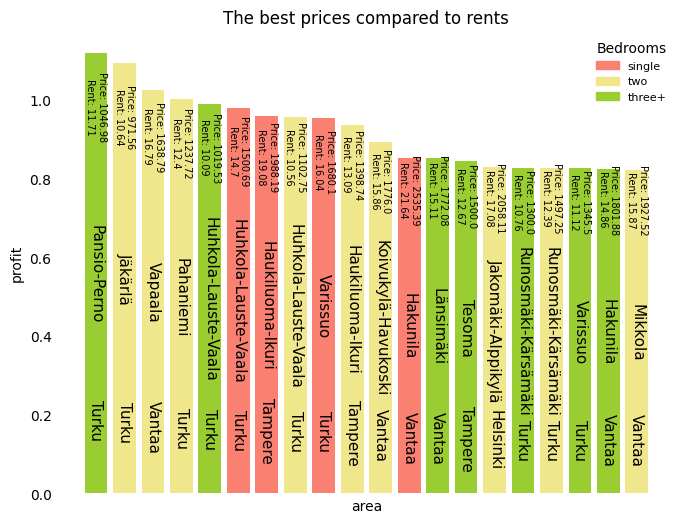

In [78]:
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.patches import Patch


colors = {'Yksiöt': 'salmon', 'Kaksiot': 'khaki', 'Kolmiot+': 'yellowgreen'}
#data=data_2022.head(10)
# Extract data for plotting
huoneluku = data['Huoneluku']
difference = data['difference']
price = data['Neliöhinta (EUR/m2)']
rent = data['Neliövuokra (eur/m2)']
kaupunginosa_x = data['Kaupunginosa_x'] 
kaupunki = data['Kaupunki'] 
# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))

# Iterate through rows to plot bars and add labels
for i, (h, diff, p, r, ks, k) in enumerate(zip(huoneluku, difference, price, rent, kaupunginosa_x, kaupunki)):
    bar_color = colors.get(h, 'gray')
    long=100/diff
    ax.bar(i, long, color=bar_color, label='Facts')
    ax.text(i, long - long/5, f'Price: {p}\nRent: {r}', ha='center', va='bottom', fontsize=7, rotation=-90)

    # Add "temp" text centered inside the bar and rotated 90 degrees
    ax.text(i, long / 2, ks, ha='center', va='center', fontsize=11, rotation=-90)
    ax.text(i, long / 2-long/3, k, ha='center', va='center', fontsize=11, rotation=-90) #, fontname='comicsans')

# Add labels and titles
ax.set_xlabel('area')
ax.set_ylabel('profit')
ax.set_title('The best prices compared to rents')
#ax.set_xticks(np.arange(len(data)))
#ax.set_xticklabels(huoneluku)
ax.set_xticks([])  # Remove x-axis labels
# ax.set_yticks([])  # Remove y-axis labels
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove x and y tick lines
ax.tick_params(axis='both', which='both', length=0)
#ax.legend()

legend_elements = [Patch(color='salmon', label='single'),
                   Patch(color='khaki', label='two'),
                   Patch(color='yellowgreen', label='three+')]
legend_headline = 'Bedrooms'
legend = ax.legend(handles=legend_elements, loc='upper right', title=legend_headline, prop={'size': 8})

# Remove legend borders
legend.get_frame().set_linewidth(0.0)

# Display the bar plot
plt.show()

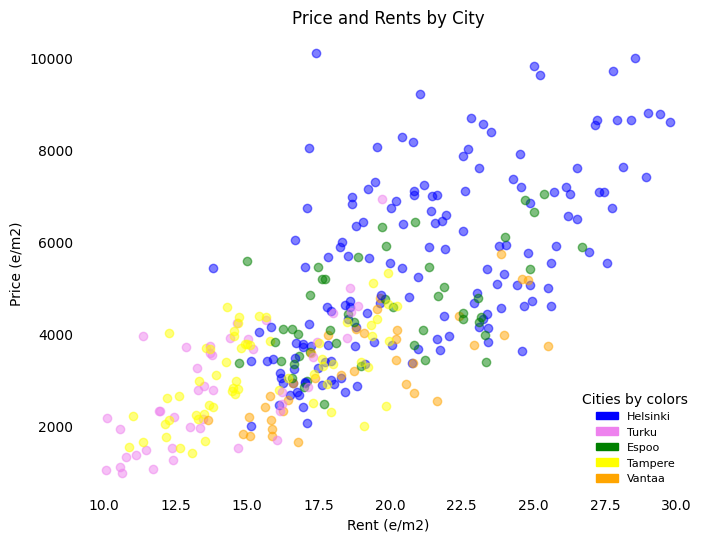

In [95]:
#SCATTERPLOT DISTINCT BY CITY AREA
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.patches import Patch

colors = {'Helsinki': 'blue', 'Turku': 'violet', 'Espoo': 'green', 'Tampere': 'yellow', 'Vantaa': 'orange'}
alpha = 0.5  # Transparency value

# Create a scatterplot
fig, ax = plt.subplots(figsize=(8, 6))
for i, row in last_year_data.iterrows():
    #price = data['Neliöhinta (EUR/m2)']
    #rent = data['Neliövuokra (eur/m2)']
    plt.scatter(row['Neliövuokra (eur/m2)'], row['Neliöhinta (EUR/m2)'], color=colors[row['Kaupunki']], alpha=alpha) #label=np.unique(row['Kaupunki']))

# Add labels and title
plt.xlabel('Rent (e/m2)')
plt.ylabel('Price (e/m2)')
plt.title('Price and Rents by City')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
legend_elements = [Patch(color='blue', label='Helsinki'),
                   Patch(color='violet', label='Turku'),
                   Patch(color='green', label='Espoo'),
                   Patch(color='yellow', label='Tampere'),
                   Patch(color='orange', label='Vantaa')]

# Add a headline to the legend
legend_headline = 'Cities by colors'

# Create the legend
legend = plt.legend(handles=legend_elements, loc='lower right', title=legend_headline, prop={'size': 8})

# Remove legend borders
legend.get_frame().set_linewidth(0.0)
# Add a legend
plt.tick_params(axis='both', which='both', length=0)
#plt.legend()

# Show the scatterplot
plt.show()

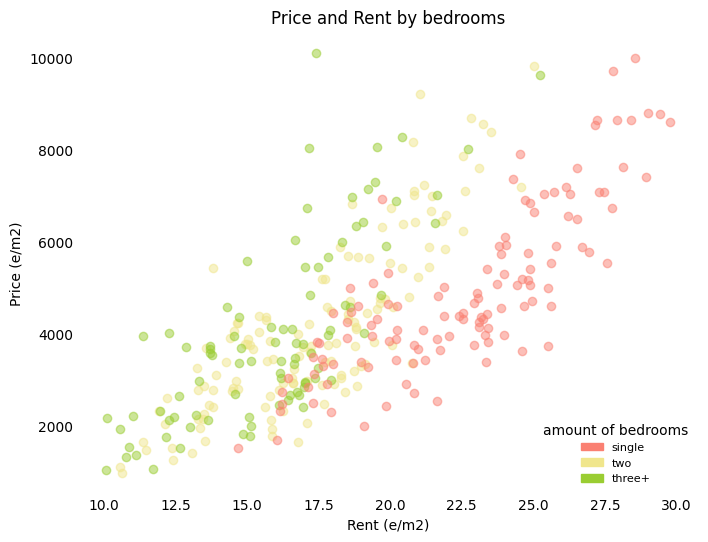

In [98]:
#SCATTERPLOT DISTINCT BY BEDROOMS
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.patches import Patch

#colors = {'Helsinki': 'blue', 'Turku': 'violet', 'Espoo': 'green', 'Tampere': 'yellow', 'Vantaa': 'orange'}
colors = {'Yksiöt': 'salmon', 'Kaksiot': 'khaki', 'Kolmiot+': 'yellowgreen'}
alpha = 0.5  # Transparency value

# Create a scatterplot
fig, ax = plt.subplots(figsize=(8, 6))
for i, row in last_year_data.iterrows():
    #price = data['Neliöhinta (EUR/m2)']
    #rent = data['Neliövuokra (eur/m2)']
    plt.scatter(row['Neliövuokra (eur/m2)'], row['Neliöhinta (EUR/m2)'], color=colors[row['Huoneluku']], alpha=alpha) #label=np.unique(row['Kaupunki']))

# Add labels and title
plt.xlabel('Rent (e/m2)')
plt.ylabel('Price (e/m2)')
plt.title('Price and Rent by bedrooms')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
legend_elements = [Patch(color='salmon', label='single'),
                   Patch(color='khaki', label='two'),
                   Patch(color='yellowgreen', label='three+')]
# Add a headline to the legend
legend_headline = 'amount of bedrooms'

# Create the legend
legend = plt.legend(handles=legend_elements, loc='lower right', title=legend_headline, prop={'size': 8})

# Remove legend borders
legend.get_frame().set_linewidth(0.0)
# Add a legend
plt.tick_params(axis='both', which='both', length=0)
#plt.legend()

# Show the scatterplot
plt.show()